In [ ]:
import random
import numpy

In [2]:

class EpsilonGreedy():
    
    '''
        This class implements epsilon-Greeey Multiarm Bandit algorithm
    '''
    def __init__( self, epsilon, counts=[], values=[] ):
        '''
            epsilon : This will be a floating point number that tell us the frequency with which 
            we should explore one of the available arms.
           
            counts  : A vector of integers of length N that tells us how many times we have played 
            each of the N arms available to us in the current bandit problem.
            
            values  : A vector of floating point numbers that defines the average amount of reward we have gotten 
            when playing each of the N arms available to us.
        '''
        self.epsilon = epsilon
        self.counts  = counts
        self. values = values
        
    def __repr__(self):
        return 'EpsilonGreedy({:.2f},{!r}, {!r})'.format(self.epsilon, self.counts, self.values)
    
    def updateEpsilon(): # For annealing
        '''
        Updates epsilon after each trail
        '''
        self.epsilon  -= (   numpy.power(self.epsilon, 4) )

    def initialize(self, n_arms):
        # Intializing / reset rewards & counts to zeros for each arm(or option)
        self.counts = [ 0   for col in range(n_arms) ]
        self.values = [ 0.0 for col in range(n_arms) ]
    
    def select_arm(self):
        ''' Returns the index of the next arm to pull '''
        
        if random.random() > self.epsilon: # Exploitation 
            m = max( self.values  )            
            if ( m > 0.0 ) :
                return self.values.index(m)
            else:
                return random.randrange( len( self.values) )            
        else: # Exploration
            return random.randrange( len( self.values) )
        
    
    def update(self, chosen_arm, reward):
        '''        
        After we pull an arm, we get a reward signal back from our system. This function update our algorithm's beliefs
        about the quality of the arm algoithm just chosen by providing this reward information.
        
        chosen_arm : The numeric index of the most recently chosen arm
        reward     : The reward received from the chosen arm
        '''
        self.counts[ chosen_arm ] += 1
        n = self.counts[ chosen_arm ]
        value = self.values[chosen_arm]
        new_value = ( ( n-1 ) * value + reward ) / float(n) 
        self.values[chosen_arm] = new_value
    


In [6]:
# Explore - Exploit tradeoff :- completely explore ( A/B Testing )

algo = EpsilonGreedy(1.0)
algo.initialize(2)
print ( "Epsilon Greedy object for A/B testing framework:- \t", algo)

algo.epsilon = 0
print ( "Epsilon Greedy object for profit maximization:-   \t", algo)




Epsilon Greedy object for A/B testing framework:- 	 EpsilonGreedy(1.00,[0, 0], [0.0, 0.0])
Epsilon Greedy object for profit maximization:-   	 EpsilonGreedy(0.00,[0, 0], [0.0, 0.0])


In [29]:
?EpsilonGreedy.update

#### When one of the arm is significantly better than the other arm ( like 50% more effective )

total reward:- 1530.00  =>  EpsilonGreedy(0.10,[5076, 94924], [0.009062253743104794, 0.015633559479162267])
total reward:- 1427.00  =>  EpsilonGreedy(0.20,[18494, 81506], [0.009084027252081761, 0.015446715579221134])
total reward:- 1380.00  =>  EpsilonGreedy(0.30,[25114, 74886], [0.00864059886915656, 0.015530272681142133])
total reward:- 1414.00  =>  EpsilonGreedy(0.40,[20051, 79949], [0.00947583661662761, 0.015309759971982105])
total reward:- 1439.00  =>  EpsilonGreedy(0.50,[25077, 74923], [0.011045978386569335, 0.01550925616966747])
total reward:- 1343.00  =>  EpsilonGreedy(0.60,[30664, 69336], [0.010305243934255172, 0.014811930310372711])
total reward:- 1366.00  =>  EpsilonGreedy(0.70,[35086, 64914], [0.009604970643561535, 0.015851742305204076])
total reward:- 1334.00  =>  EpsilonGreedy(0.80,[40087, 59913], [0.009828622745528514, 0.01568941632033128])
total reward:- 1309.00  =>  EpsilonGreedy(0.90,[44933, 55067], [0.01014844323770947, 0.01549022100350478])
total reward:- 1200.00  =>

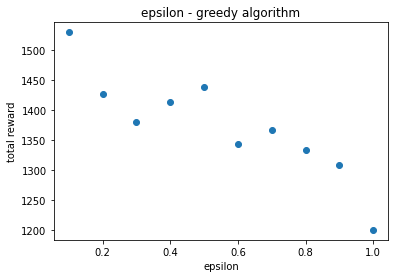

In [16]:
armsRewardForGivenTrial = lambda x : numpy.random.choice( ("s", "f"), p=[ x, 1-x])

successProbabilities = [ 0.01, 0.015 ] # Options success rates in Hindsight

totalRewardForEachEpsilon = []

for eEpsilon in numpy.arange(0.1, 1.1, 0.1):
    p = EpsilonGreedy( eEpsilon,[0,0],[0,0])
    for ee in range(100000):
        chosen_arm = p.select_arm() 
        p.update ( chosen_arm , 1 if armsRewardForGivenTrial(successProbabilities[chosen_arm]) == 's' else 0 )
    
    totalReward = sum( [ i*j for i,j in zip( p.counts, p.values)] )
    
    totalRewardForEachEpsilon.append( (p.epsilon, totalReward) )
    print ( "total reward:- {0:.2f}".format(  totalReward ) ,  " => ",  p)

import pandas
rewardsDF = pandas.DataFrame( totalRewardForEachEpsilon, columns=["epsilon", "total_reward"])

import matplotlib.pyplot as plt
plt.scatter(rewardsDF['epsilon'], rewardsDF['total_reward'])
plt.title("epsilon - greedy algorithm")
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.

Comments:
- Total reward is decreasing with increasing epsilon, which means increasing in exploration has adverse affect on total reward 

#### When one of the arm is not so significantly better than the other arm ( like ~10% more effective )

total reward:- 1108.00  =>  EpsilonGreedy(0.10,[5723, 94277], [0.009959811287786141, 0.011148000042428247])
total reward:- 1040.00  =>  EpsilonGreedy(0.20,[41129, 58871], [0.010211772715115855, 0.010531501078629577])
total reward:- 1013.00  =>  EpsilonGreedy(0.30,[17327, 82673], [0.008830149477693753, 0.010402428846176938])
total reward:- 1042.00  =>  EpsilonGreedy(0.40,[33997, 66003], [0.009353766508809567, 0.010969198369771147])
total reward:- 1092.00  =>  EpsilonGreedy(0.50,[31359, 68641], [0.009821741764724648, 0.011421745021197235])
total reward:- 1070.00  =>  EpsilonGreedy(0.60,[47212, 52788], [0.010209268829958483, 0.011138895203455327])
total reward:- 979.00  =>  EpsilonGreedy(0.70,[37477, 62523], [0.008671985484430413, 0.010460150664555539])
total reward:- 1098.00  =>  EpsilonGreedy(0.80,[54858, 45142], [0.011174304568157697, 0.010743874883700289])
total reward:- 1060.00  =>  EpsilonGreedy(0.90,[47813, 52187], [0.010143684771923912, 0.01101806963420011])
total reward:- 1086.00

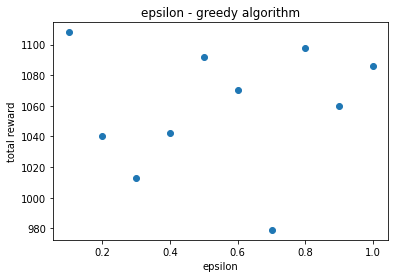

In [33]:
armsRewardForGivenTrial = lambda x : numpy.random.choice( ("s", "f"), p=[ x, 1-x]) # Bernoulli Arm


successProbabilities = [ 0.01, 0.011 ] # Options success rates in Hindsight

totalRewardForEachEpsilon = []

for eEpsilon in numpy.arange(0.1, 1.1, 0.1):
    egAlgo = EpsilonGreedy( eEpsilon,[0,0],[0,0])
    for ee in range(100000):
        chosen_arm = egAlgo.select_arm() 
        egAlgo.update ( chosen_arm , 1 if armsRewardForGivenTrial(successProbabilities[chosen_arm]) == 's' else 0 )
    
    totalReward = sum( [ i*j for i,j in zip( egAlgo.counts, egAlgo.values)] )
    
    totalRewardForEachEpsilon.append( (egAlgo.epsilon, totalReward) )
    print ( "total reward:- {0:.2f}".format(  totalReward ) ,  " => ",  egAlgo)

import pandas
rewardsDF = pandas.DataFrame( totalRewardForEachEpsilon, columns=["epsilon", "total_reward"])

import matplotlib.pyplot as plt
plt.scatter(rewardsDF['epsilon'], rewardsDF['total_reward'])
plt.title("epsilon - greedy algorithm")
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.show() # Depending on whether you use IPython or interactive mode, etc.